<a href="https://colab.research.google.com/github/NahumSolCas01/a/blob/main/Ejercicios/250228_IRIS_KERAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IMPORTAR LIBRERIAS
import numpy as np
from keras import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [2]:
# Cargar el conjunto de datos iris
iris = load_iris()


In [3]:
#Asignar a x y y
X = iris.data
Y = iris.target

In [4]:
#CODIFICAR LAS SALIDAS EN OHE
Y = to_categorical(Y)

In [5]:
#Normalizar los datos de entrada
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [6]:
#Dividir la base de entrenamiento y Prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

In [7]:
#Crear una red MLP 4-3-2-3
model = Sequential()
model.add(Dense(24, input_dim=4, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
#Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

In [9]:
#Entrenar el modelo
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=150)

Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 232ms/step - accuracy: 0.3101 - loss: 0.2346 - val_accuracy: 0.5467 - val_loss: 0.2287
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.4905 - loss: 0.2295 - val_accuracy: 0.6533 - val_loss: 0.2250
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.6693 - loss: 0.2244 - val_accuracy: 0.6667 - val_loss: 0.2223
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.6693 - loss: 0.2213 - val_accuracy: 0.6533 - val_loss: 0.2199
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6654 - loss: 0.2190 - val_accuracy: 0.6533 - val_loss: 0.2171
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6615 - loss: 0.2154 - val_accuracy: 0.6533 - val_loss: 0.2143
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.6849 - loss: 0.2113 - val_accuracy: 0.6667 - val_loss: 0.2115
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6888 - loss: 0.2077 - val_accuracy: 0.6667 - val_l

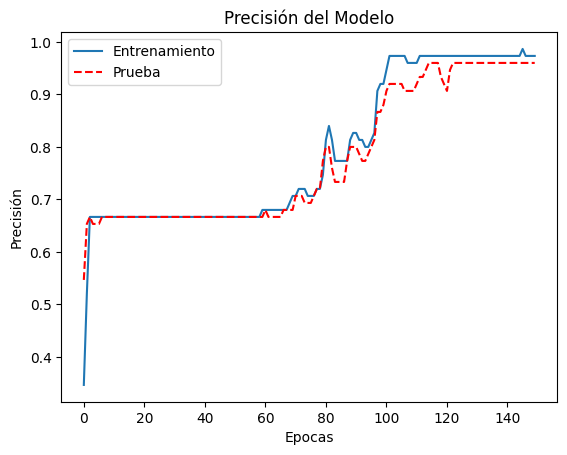

In [10]:
#Gráficar el desempeño de la RNA
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], 'r--')
plt.title('Precisión del Modelo')
plt.ylabel('Precisión')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.savefig('IrisPrecision.jpg', dpi=300)
plt.show()


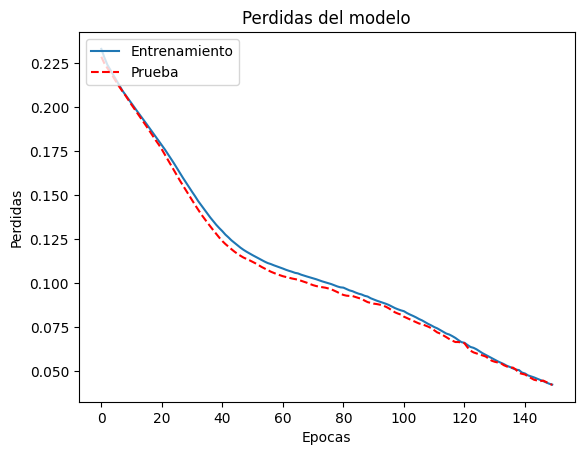

In [11]:
#Gráficar el desempeño de la RNA
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'r--')
plt.title('Perdidas del modelo')
plt.ylabel('Perdidas')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.savefig('IrisPerdidas.jpg', dpi=300)
plt.show()


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 24)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             375 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,952 (7.63 KB)

 Trainable params: 650 (2.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,302 (5.09 KB)